In [1]:
import numpy as np
from scipy import stats

import re
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

Reading in and cleaning the data:

In [3]:
Glassdoor_df =pd.read_csv('glassdoor.csv')
Glassdoor_df.head()

,EmpType,Outlook,Cons,CareerOpp,Name,CultureVal,Recommend,Advice,OpCEO,Pros,UserSumm,AuthLoc,AuthTitle,SnrMgmt,DateRev,CompBen,Rating,WorkLife
0,Current,Neutral Outlook,"Cross Selling is the only focus now, firing em...",3.0,Wells Fargo,5.0,Recommends,Cross sell expectations are going to destroy t...,Approves of,Benefits (but cost creeping up and coverage cr...,I have been working at Wells Fargo (More than ...,NaN,Current Employee - Anonymous,2.0,"Dec 1, 2014",4.0,4.0,4.0
1,Current,Negative Outlook,"Ethics & management at high level, lower compe...",4.0,Wells Fargo,5.0,Recommends,Upper management ruined WF reputation by actin...,No opinion of,"People & management of immediate work group, w...",I have been working at Wells Fargo full-time (...,"San Francisco, CA",Current Employee - Vice President,1.0,"May 18, 2017",3.0,4.0,5.0
2,Current,Positive Outlook,At times there is not appropriate resources to...,4.0,Wells Fargo,5.0,Recommends,NaN,Approves of,"Learning and growth opportunities, management,...",I have been working at Wells Fargo full-time (...,"Minneapolis, MN",Current Employee - Senior Auditor,4.0,"Jul 21, 2017",5.0,4.0,5.0
3,Current,Positive Outlook,Managers tend to manage up better than managin...,4.0,Wells Fargo,4.0,Recommends,NaN,Approves of,"Well established, deeply rooted in the communi...",I have been working at Wells Fargo full-time (...,"Minneapolis, MN",Current Employee - Implementation Consultant,4.0,"Jul 20, 2017",4.0,4.0,4.0
4,Former,NaN,Disappointing when someone who's been there 2 ...,5.0,Wells Fargo,4.0,NaN,Pay job families similar.,NaN,Great company. Good benefits. Able to move up ...,I worked at Wells Fargo full-time (More than 5...,"Fort Myers, FL",Former Employee - Service Manager II,3.0,"Jul 26, 2017",4.0,4.0,3.0


In [4]:
# strip out lenght of service from UserSumm column into new column.
Glassdoor_df['ServLength'] = [x[x.find("(")+1:x.find(")")] for x in Glassdoor_df.UserSumm.apply(str)]

In [5]:
# separate year of the review into it's own column so we can analyze trends by year.
Glassdoor_df[['date','year']]=Glassdoor_df['DateRev'].str[0:].str.split(',', expand=True)
Glassdoor_df.head()

,EmpType,Outlook,Cons,CareerOpp,Name,CultureVal,Recommend,Advice,OpCEO,Pros,...,AuthLoc,AuthTitle,SnrMgmt,DateRev,CompBen,Rating,WorkLife,ServLength,date,year
0,Current,Neutral Outlook,"Cross Selling is the only focus now, firing em...",3.0,Wells Fargo,5.0,Recommends,Cross sell expectations are going to destroy t...,Approves of,Benefits (but cost creeping up and coverage cr...,...,NaN,Current Employee - Anonymous,2.0,"Dec 1, 2014",4.0,4.0,4.0,More than 5 years,Dec 1,2014
1,Current,Negative Outlook,"Ethics & management at high level, lower compe...",4.0,Wells Fargo,5.0,Recommends,Upper management ruined WF reputation by actin...,No opinion of,"People & management of immediate work group, w...",...,"San Francisco, CA",Current Employee - Vice President,1.0,"May 18, 2017",3.0,4.0,5.0,More than 10 years,May 18,2017
2,Current,Positive Outlook,At times there is not appropriate resources to...,4.0,Wells Fargo,5.0,Recommends,NaN,Approves of,"Learning and growth opportunities, management,...",...,"Minneapolis, MN",Current Employee - Senior Auditor,4.0,"Jul 21, 2017",5.0,4.0,5.0,More than 10 years,Jul 21,2017
3,Current,Positive Outlook,Managers tend to manage up better than managin...,4.0,Wells Fargo,4.0,Recommends,NaN,Approves of,"Well established, deeply rooted in the communi...",...,"Minneapolis, MN",Current Employee - Implementation Consultant,4.0,"Jul 20, 2017",4.0,4.0,4.0,More than 10 years,Jul 20,2017
4,Former,NaN,Disappointing when someone who's been there 2 ...,5.0,Wells Fargo,4.0,NaN,Pay job families similar.,NaN,Great company. Good benefits. Able to move up ...,...,"Fort Myers, FL",Former Employee - Service Manager II,3.0,"Jul 26, 2017",4.0,4.0,3.0,More than 5 years,Jul 26,2017


In [6]:
# Get a bettee understanding of the data:
print(Glassdoor_df.describe())

          CareerOpp    CultureVal       SnrMgmt       CompBen        Rating  \
count  56200.000000  46655.000000  55698.000000  56190.000000  62959.000000   
mean       3.324075      3.288051      2.945591      3.448469      3.360647   
std        1.192160      1.311578      1.266972      1.093463      1.133579   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      2.000000      2.000000      3.000000      3.000000   
50%        3.000000      3.000000      3.000000      3.500000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

           WorkLife  
count  56154.000000  
mean       3.240019  
std        1.232800  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  


In [7]:
# read in data from second spider containing details about each organization:
Company_summary_df =pd.read_csv('gd.csv')
Company_summary_df

,Name,HeadQ,Revenue,Founded,Type,Size
0,Brown Brothers Harriman,"New York, NY",$2 to $5 billion (USD) per year,1818,Company - Private,1001 to 5000 employees
1,Centerview Partners,"New York, NY",$25 to $50 million (USD) per year,Unknown,Company - Private,51 to 200 employees
2,Duff & Phelps,"New York, NY",$1 to $2 billion (USD) per year,1932,Company - Private,1001 to 5000 employees
3,Evercore Partners,"New York, NY",$1 to $2 billion (USD) per year,2005,Company - Public (EVR),1001 to 5000 employees
4,Stifel Financial,"Saint Louis, MO",$2 to $5 billion (USD) per year,NaN,Company - Public (SF),5001 to 10000 employees
5,Cantor Fitzgerald,"New York, NY",$100 to $500 million (USD) per year,1945,Company - Private,1001 to 5000 employees
6,Wells Fargo,"San Francisco, CA",$10+ billion (USD) per year,1852,Company - Public (WFC),10000+ employees
7,Deutsche Bank,Frankfurt am Main (Germany),$10+ billion (USD) per year,1870,Company - Public (DB),10000+ employees
8,Bank of America,"Charlotte, NC",$10+ billion (USD) per year,1904,Company - Public (BAC),10000+ employees
9,Citi,"New York, NY",$10+ billion (USD) per year,1812,Company - Public (C),10000+ employees


In [8]:
# based on reasearch, separate companies into specific classes:
Company_summary_df['BankClass'] = ['Boutique','Boutique', 'Boutique', 'Boutique',\
                               'Boutique', 'Boutique', 'In Between', 'Bulge Bracket',\
                              'Bulge Bracket', 'Bulge Bracket', 'Bulge Bracket', 'Bulge Bracket', 'Bulge Bracket' ]

Company_summary_df

,Name,HeadQ,Revenue,Founded,Type,Size,BankClass
0,Brown Brothers Harriman,"New York, NY",$2 to $5 billion (USD) per year,1818,Company - Private,1001 to 5000 employees,Boutique
1,Centerview Partners,"New York, NY",$25 to $50 million (USD) per year,Unknown,Company - Private,51 to 200 employees,Boutique
2,Duff & Phelps,"New York, NY",$1 to $2 billion (USD) per year,1932,Company - Private,1001 to 5000 employees,Boutique
3,Evercore Partners,"New York, NY",$1 to $2 billion (USD) per year,2005,Company - Public (EVR),1001 to 5000 employees,Boutique
4,Stifel Financial,"Saint Louis, MO",$2 to $5 billion (USD) per year,NaN,Company - Public (SF),5001 to 10000 employees,Boutique
5,Cantor Fitzgerald,"New York, NY",$100 to $500 million (USD) per year,1945,Company - Private,1001 to 5000 employees,Boutique
6,Wells Fargo,"San Francisco, CA",$10+ billion (USD) per year,1852,Company - Public (WFC),10000+ employees,In Between
7,Deutsche Bank,Frankfurt am Main (Germany),$10+ billion (USD) per year,1870,Company - Public (DB),10000+ employees,Bulge Bracket
8,Bank of America,"Charlotte, NC",$10+ billion (USD) per year,1904,Company - Public (BAC),10000+ employees,Bulge Bracket
9,Citi,"New York, NY",$10+ billion (USD) per year,1812,Company - Public (C),10000+ employees,Bulge Bracket


In [9]:
# further breakdown by subclass:
Company_summary_df['SubClass'] = ['Other Boutique','Top Boutique', 'Other Boutique', 'Top Boutique',\
                               'Other Boutique', 'Other Boutique', 'In Between', 'Other Bulge Bracket',\
                              'Other Bulge Bracket', 'Other Bulge Bracket', 'Top Bulge Bracket', 'Top Bulge Bracket',\
                                  'Top Bulge Bracket']

Company_summary_df

,Name,HeadQ,Revenue,Founded,Type,Size,BankClass,SubClass
0,Brown Brothers Harriman,"New York, NY",$2 to $5 billion (USD) per year,1818,Company - Private,1001 to 5000 employees,Boutique,Other Boutique
1,Centerview Partners,"New York, NY",$25 to $50 million (USD) per year,Unknown,Company - Private,51 to 200 employees,Boutique,Top Boutique
2,Duff & Phelps,"New York, NY",$1 to $2 billion (USD) per year,1932,Company - Private,1001 to 5000 employees,Boutique,Other Boutique
3,Evercore Partners,"New York, NY",$1 to $2 billion (USD) per year,2005,Company - Public (EVR),1001 to 5000 employees,Boutique,Top Boutique
4,Stifel Financial,"Saint Louis, MO",$2 to $5 billion (USD) per year,NaN,Company - Public (SF),5001 to 10000 employees,Boutique,Other Boutique
5,Cantor Fitzgerald,"New York, NY",$100 to $500 million (USD) per year,1945,Company - Private,1001 to 5000 employees,Boutique,Other Boutique
6,Wells Fargo,"San Francisco, CA",$10+ billion (USD) per year,1852,Company - Public (WFC),10000+ employees,In Between,In Between
7,Deutsche Bank,Frankfurt am Main (Germany),$10+ billion (USD) per year,1870,Company - Public (DB),10000+ employees,Bulge Bracket,Other Bulge Bracket
8,Bank of America,"Charlotte, NC",$10+ billion (USD) per year,1904,Company - Public (BAC),10000+ employees,Bulge Bracket,Other Bulge Bracket
9,Citi,"New York, NY",$10+ billion (USD) per year,1812,Company - Public (C),10000+ employees,Bulge Bracket,Other Bulge Bracket


In [10]:
# create a simple table as a lookup for the main data frame:
lookup = Company_summary_df[['Name', 'BankClass', 'SubClass']]
lookup

,Name,BankClass,SubClass
0,Brown Brothers Harriman,Boutique,Other Boutique
1,Centerview Partners,Boutique,Top Boutique
2,Duff & Phelps,Boutique,Other Boutique
3,Evercore Partners,Boutique,Top Boutique
4,Stifel Financial,Boutique,Other Boutique
5,Cantor Fitzgerald,Boutique,Other Boutique
6,Wells Fargo,In Between,In Between
7,Deutsche Bank,Bulge Bracket,Other Bulge Bracket
8,Bank of America,Bulge Bracket,Other Bulge Bracket
9,Citi,Bulge Bracket,Other Bulge Bracket


In [11]:
# merge the two so we have the class and subclass in the main data frame:
gd_fin = pd.merge(Glassdoor_df, lookup, how='left', on ='Name')
gd_fin.head()

,EmpType,Outlook,Cons,CareerOpp,Name,CultureVal,Recommend,Advice,OpCEO,Pros,...,SnrMgmt,DateRev,CompBen,Rating,WorkLife,ServLength,date,year,BankClass,SubClass
0,Current,Neutral Outlook,"Cross Selling is the only focus now, firing em...",3.0,Wells Fargo,5.0,Recommends,Cross sell expectations are going to destroy t...,Approves of,Benefits (but cost creeping up and coverage cr...,...,2.0,"Dec 1, 2014",4.0,4.0,4.0,More than 5 years,Dec 1,2014,In Between,In Between
1,Current,Negative Outlook,"Ethics & management at high level, lower compe...",4.0,Wells Fargo,5.0,Recommends,Upper management ruined WF reputation by actin...,No opinion of,"People & management of immediate work group, w...",...,1.0,"May 18, 2017",3.0,4.0,5.0,More than 10 years,May 18,2017,In Between,In Between
2,Current,Positive Outlook,At times there is not appropriate resources to...,4.0,Wells Fargo,5.0,Recommends,NaN,Approves of,"Learning and growth opportunities, management,...",...,4.0,"Jul 21, 2017",5.0,4.0,5.0,More than 10 years,Jul 21,2017,In Between,In Between
3,Current,Positive Outlook,Managers tend to manage up better than managin...,4.0,Wells Fargo,4.0,Recommends,NaN,Approves of,"Well established, deeply rooted in the communi...",...,4.0,"Jul 20, 2017",4.0,4.0,4.0,More than 10 years,Jul 20,2017,In Between,In Between
4,Former,NaN,Disappointing when someone who's been there 2 ...,5.0,Wells Fargo,4.0,NaN,Pay job families similar.,NaN,Great company. Good benefits. Able to move up ...,...,3.0,"Jul 26, 2017",4.0,4.0,3.0,More than 5 years,Jul 26,2017,In Between,In Between


In [12]:
# removing Wells Fargo from our analysis as it does not fall within the main two categories:
#(Wells Fargo is used elsewhere in our wordcloud created in R)
graph_df = gd_fin[gd_fin.BankClass.isin(['Boutique', 'Bulge Bracket'])]
graph_df.head()

,EmpType,Outlook,Cons,CareerOpp,Name,CultureVal,Recommend,Advice,OpCEO,Pros,...,SnrMgmt,DateRev,CompBen,Rating,WorkLife,ServLength,date,year,BankClass,SubClass
10,Current,Positive Outlook,High attrition makes for a stressful situation...,3.0,Deutsche Bank,5.0,Recommends,NaN,No opinion of,Good managers that give adequate space and fre...,...,4.0,"Jul 25, 2017",5.0,5.0,4.0,na,Jul 25,2017,Bulge Bracket,Other Bulge Bracket
11,Current,Positive Outlook,"It can be tough for internal transfers, raises...",3.0,Deutsche Bank,5.0,Recommends,Be your employee's champions - promote them wh...,Approves of,The company has a ton of opportunities to get ...,...,3.0,"Jul 22, 2017",4.0,4.0,4.0,I have been working at Deutsche Bank full-tim,Jul 22,2017,Bulge Bracket,Other Bulge Bracket
12,Current,Positive Outlook,"Large firm, employees can be pretentious. Othe...",4.0,Deutsche Bank,4.0,Recommends,NaN,Approves of,"Good benefits, appreciates the audit departmen...",...,3.0,"Jul 12, 2017",5.0,4.0,5.0,na,Jul 12,2017,Bulge Bracket,Other Bulge Bracket
13,Former,Positive Outlook,Long work hours and internal systems were poor...,3.0,Deutsche Bank,5.0,Recommends,NaN,No opinion of,The work environment and company benefits were...,...,3.0,"Jul 12, 2017",3.0,4.0,2.0,More than 3 years,Jul 12,2017,Bulge Bracket,Other Bulge Bracket
14,Current,Neutral Outlook,"Few, if any, opportunities for upward mobility...",1.0,Deutsche Bank,2.0,Doesn't Recommend,Compensation must be commiserate with market v...,Approves of,"You can gain valuable experience very quickly,...",...,2.0,"Jul 25, 2017",3.0,2.0,2.0,More than a year,Jul 25,2017,Bulge Bracket,Other Bulge Bracket


In [13]:
# given we have a better spread of reviews between 2014 and 2017
# we will subset our data accordingly:
graph_df = graph_df[(graph_df.year.astype(float) > 2013) & (graph_df.year.astype(float)  <= 2017)]
graph_df.head()

,EmpType,Outlook,Cons,CareerOpp,Name,CultureVal,Recommend,Advice,OpCEO,Pros,...,SnrMgmt,DateRev,CompBen,Rating,WorkLife,ServLength,date,year,BankClass,SubClass
10,Current,Positive Outlook,High attrition makes for a stressful situation...,3.0,Deutsche Bank,5.0,Recommends,NaN,No opinion of,Good managers that give adequate space and fre...,...,4.0,"Jul 25, 2017",5.0,5.0,4.0,na,Jul 25,2017,Bulge Bracket,Other Bulge Bracket
11,Current,Positive Outlook,"It can be tough for internal transfers, raises...",3.0,Deutsche Bank,5.0,Recommends,Be your employee's champions - promote them wh...,Approves of,The company has a ton of opportunities to get ...,...,3.0,"Jul 22, 2017",4.0,4.0,4.0,I have been working at Deutsche Bank full-tim,Jul 22,2017,Bulge Bracket,Other Bulge Bracket
12,Current,Positive Outlook,"Large firm, employees can be pretentious. Othe...",4.0,Deutsche Bank,4.0,Recommends,NaN,Approves of,"Good benefits, appreciates the audit departmen...",...,3.0,"Jul 12, 2017",5.0,4.0,5.0,na,Jul 12,2017,Bulge Bracket,Other Bulge Bracket
13,Former,Positive Outlook,Long work hours and internal systems were poor...,3.0,Deutsche Bank,5.0,Recommends,NaN,No opinion of,The work environment and company benefits were...,...,3.0,"Jul 12, 2017",3.0,4.0,2.0,More than 3 years,Jul 12,2017,Bulge Bracket,Other Bulge Bracket
14,Current,Neutral Outlook,"Few, if any, opportunities for upward mobility...",1.0,Deutsche Bank,2.0,Doesn't Recommend,Compensation must be commiserate with market v...,Approves of,"You can gain valuable experience very quickly,...",...,2.0,"Jul 25, 2017",3.0,2.0,2.0,More than a year,Jul 25,2017,Bulge Bracket,Other Bulge Bracket


In [14]:
# we want to graph by bankclass in our years 2014 -2017
graph_df2 = graph_df.groupby(['BankClass', 'year'])

In [16]:
graph_gd =graph_df2.mean().reset_index()
graph_gd

,BankClass,year,CareerOpp,CultureVal,SnrMgmt,CompBen,Rating,WorkLife
0,Boutique,2014,2.855856,3.009174,2.694444,2.827273,3.067669,3.231481
1,Boutique,2015,3.235294,3.476471,3.266272,3.023392,3.392857,3.341040
2,Boutique,2016,3.094787,3.419048,3.239234,2.980952,3.390152,3.353774
3,Boutique,2017,3.010101,3.364583,3.123711,3.020619,3.250000,3.175258
4,Bulge Bracket,2014,3.239323,3.229278,2.847570,3.450266,3.332580,3.188877
5,Bulge Bracket,2015,3.304215,3.270115,2.907738,3.450942,3.397527,3.141448
6,Bulge Bracket,2016,3.393726,3.368760,3.003604,3.545622,3.514724,3.216973
7,Bulge Bracket,2017,3.446178,3.437186,3.070738,3.569830,3.562094,3.236632


In [17]:
# taking a look at the standard deviations:
graph_gd2 =graph_df2.std().reset_index()
graph_gd2

,BankClass,year,CareerOpp,CultureVal,SnrMgmt,CompBen,Rating,WorkLife
0,Boutique,2014,1.333804,1.436917,1.410629,1.373799,1.343872,1.286933
1,Boutique,2015,1.217691,1.346496,1.320664,1.116471,1.165201,1.309355
2,Boutique,2016,1.305855,1.336144,1.355257,1.205894,1.203314,1.332188
3,Boutique,2017,1.388693,1.444553,1.445234,1.314814,1.358987,1.369385
4,Bulge Bracket,2014,1.173801,1.262985,1.211996,1.077370,1.101198,1.222956
5,Bulge Bracket,2015,1.198933,1.283244,1.257725,1.119271,1.102090,1.240276
6,Bulge Bracket,2016,1.186194,1.281551,1.272627,1.102386,1.093484,1.239227
7,Bulge Bracket,2017,1.192249,1.269015,1.268775,1.111926,1.103766,1.251569


Data Visualizations:

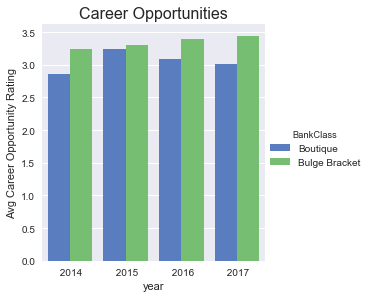

In [18]:
c_o = sns.factorplot(x="year", y="CareerOpp", hue="BankClass", data=graph_gd,
                   size=4, kind="bar", palette="muted")
c_o.despine(left=True)
c_o.set_ylabels("Avg Career Opportunity Rating")
c_o.ax.set_title('Career Opportunities', fontsize=16)

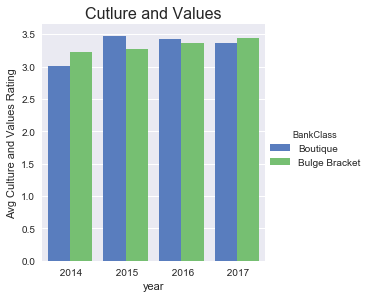

In [19]:
c_v = sns.factorplot(x="year", y="CultureVal", hue="BankClass", data=graph_gd,
                   size=4, kind="bar", palette="muted")
c_v.despine(left=True)
c_v.set_ylabels("Avg Culture and Values Rating")
c_v.ax.set_title('Cutlure and Values', fontsize=16)

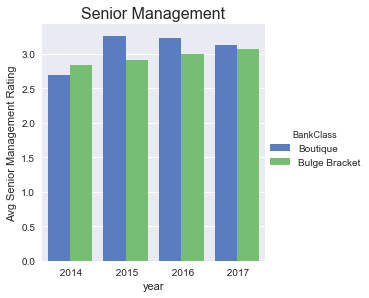

In [20]:
s_m = sns.factorplot(x="year", y="SnrMgmt", hue="BankClass", data=graph_gd,
                   size=4, kind="bar", palette="muted")
s_m.despine(left=True)
s_m.set_ylabels("Avg Senior Management Rating")
s_m.ax.set_title('Senior Management', fontsize=16)

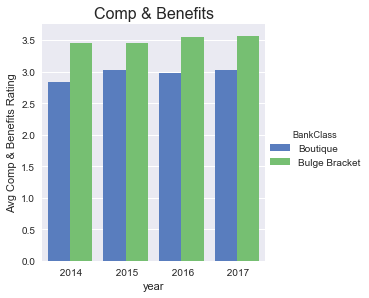

In [21]:
c_b = sns.factorplot(x="year", y="CompBen", hue="BankClass", data=graph_gd,
                   size=4, kind="bar", palette="muted")
c_b.despine(left=True)
c_b.set_ylabels("Avg Comp & Benefits Rating")
c_b.ax.set_title('Comp & Benefits', fontsize=16)

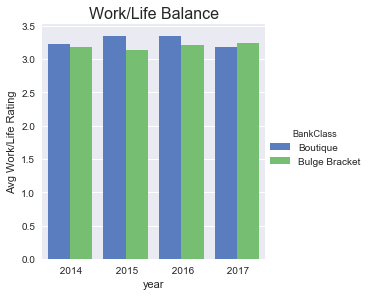

In [22]:
w_l = sns.factorplot(x="year", y="WorkLife", hue="BankClass", data=graph_gd,
                   size=4, kind="bar", palette="muted")
w_l.despine(left=True)
w_l.set_ylabels("Avg Work/Life Rating")
w_l.ax.set_title('Work/Life Balance', fontsize=16)

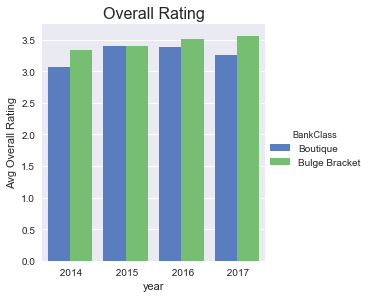

In [23]:
r = sns.factorplot(x="year", y="Rating",hue="BankClass", data=graph_gd,
                   size=4, kind="bar", palette="muted")
r.despine(left=True)
r.set_ylabels("Avg Overall Rating")
r.ax.set_title('Overall Rating', fontsize=16)

In [24]:
# grouping by sub-class:
graph_df3 = graph_df[(graph_df.year.astype(float) > 2013) & (graph_df.year.astype(float)  <= 2017)]

In [25]:
graph_df4 = graph_df3.groupby(['SubClass', 'year'])

In [28]:
graph_gd_sub =graph_df4.mean().reset_index()
graph_gd_sub

,SubClass,year,CareerOpp,CultureVal,SnrMgmt,CompBen,Rating,WorkLife
0,Other Boutique,2014,2.761905,2.922330,2.607843,2.711538,2.984127,3.225490
1,Other Boutique,2015,3.179012,3.450617,3.211180,2.944785,3.365591,3.359756
2,Other Boutique,2016,3.020305,3.360406,3.188776,2.888325,3.332000,3.381910
3,Other Boutique,2017,2.818182,3.188235,2.953488,2.790698,3.060606,3.162791
4,Other Bulge Bracket,2014,3.118358,3.121734,2.720878,3.445779,3.228426,3.284854
5,Other Bulge Bracket,2015,3.189535,3.169177,2.781035,3.396168,3.283577,3.220694
6,Other Bulge Bracket,2016,3.265774,3.244810,2.877162,3.501650,3.403430,3.298174
7,Other Bulge Bracket,2017,3.338817,3.315325,2.941281,3.541053,3.468027,3.323055
8,Top Boutique,2014,4.500000,4.500000,4.166667,4.833333,4.571429,3.333333
9,Top Boutique,2015,4.375000,4.000000,4.375000,4.625000,3.900000,3.000000


In [29]:
# checking the standard deviation:
sd_sub = graph_df4.std()
sd_sub

CareerOpp  CultureVal   SnrMgmt   CompBen  \
SubClass            year                                               
Other Boutique       2014   1.304753    1.418984  1.394167  1.319555   
                     2015   1.210227    1.333060  1.305804  1.072965   
                     2016   1.273591    1.327517  1.362530  1.159572   
                     2017   1.326524    1.426736  1.421739  1.199179   
Other Bulge Bracket  2014   1.167943    1.267215  1.200420  1.062478   
                     2015   1.187471    1.287707  1.238349  1.111483   
                     2016   1.204938    1.289146  1.264525  1.090981   
                     2017   1.191124    1.279324  1.260519  1.108330   
Top Boutique         2014   0.547723    0.836660  0.752773  0.408248   
                     2015   0.744024    1.603567  1.187735  0.744024   
                     2016   1.350621    1.182132  1.000000  1.043908   
                     2017   0.820200    0.646670  0.820200  0.603023   
Top Bulge Bracket    2014   1.161702    1.242267  1.206498  1.097759   
                     2015   1.197527    1.265614  1.263796  1.125486   
                     2016   1.142139    1.254899  1.265183  1.114255   
                     2017   1.178888    1.237274  1.259603  1.115782   

                             Rating  WorkLife  
SubClass            year                       
Other Boutique       2014  1.326554  1.319367  
                     2015  1.160475  1.295993  
                     2016  1.198131  1.331390  
                     2017  1.315668  1.353518  
Other Bulge Bracket  2014  1.106587  1.211790  
                     2015  1.101466  1.246050  
                     2016  1.106298  1.233187  
                     2017  1.119381  1.235380  
Top Boutique         2014  0.534522  0.516398  
                     2015  1.197219  1.581139  
                     2016  0.755929  1.320451  
                     2017  0.630425  1.555050  
Top Bulge Bracket    2014  1.078466  1.226192  
                     2015  1.085904  1.225226  
                     2016  1.061266  1.239409  
                     2017  1.071627  1.263903

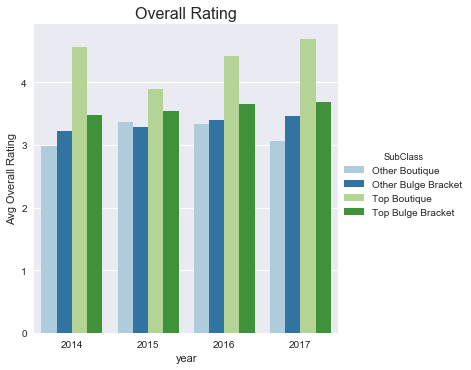

In [30]:
r = sns.factorplot(x="year", y="Rating", hue="SubClass", data=graph_gd_sub,
                   size=5, kind="bar", palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Overall Rating")
r.ax.set_title('Overall Rating', fontsize=16)

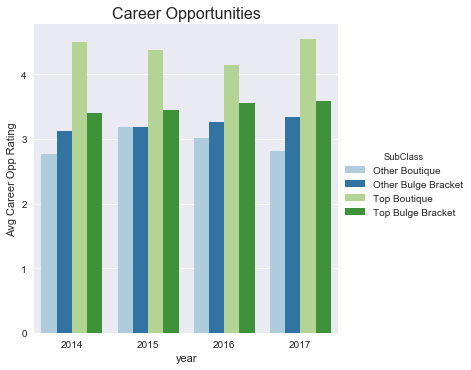

In [31]:
r = sns.factorplot(x="year", y="CareerOpp", hue="SubClass", data=graph_gd_sub,
                   size=5, kind="bar", palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Career Opp Rating")
r.ax.set_title('Career Opportunities', fontsize=16)

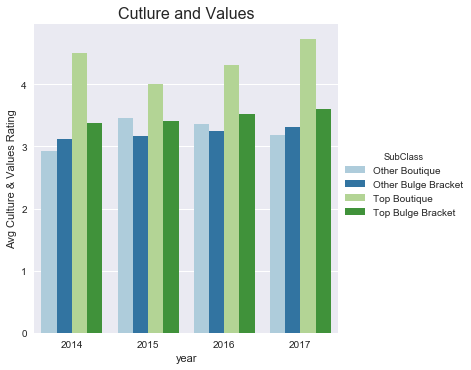

In [32]:
r = sns.factorplot(x="year", y="CultureVal", hue="SubClass", data=graph_gd_sub,
                   size=5, kind="bar", palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Culture & Values Rating")
r.ax.set_title('Cutlure and Values', fontsize=16)

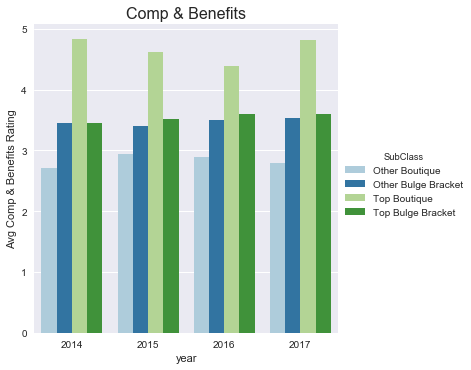

In [33]:
r = sns.factorplot(x="year", y="CompBen", hue="SubClass", data=graph_gd_sub,
                   size=5, kind="bar", palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Comp & Benefits Rating")
r.ax.set_title('Comp & Benefits', fontsize=16)

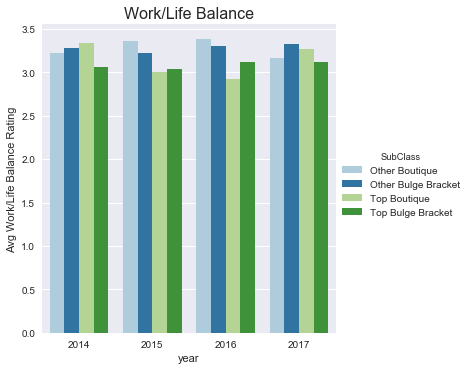

In [34]:
r = sns.factorplot(x="year", y="WorkLife", hue="SubClass", data=graph_gd_sub,
                   size=5, kind="bar", palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Work/Life Balance Rating")
r.ax.set_title('Work/Life Balance', fontsize=16)

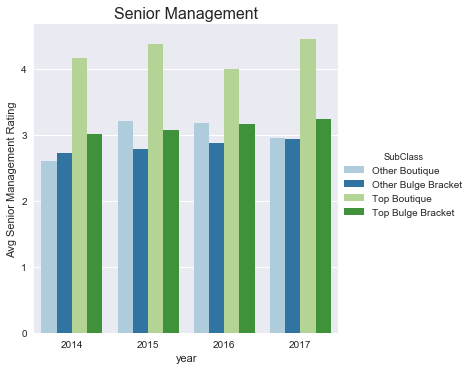

In [35]:
r = sns.factorplot(x="year", y="SnrMgmt", hue="SubClass", data=graph_gd_sub,
                   size=5, kind="bar", palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Senior Management Rating")
r.ax.set_title('Senior Management', fontsize=16)

In [36]:
graph_df_emp = graph_df[graph_df.year.astype(float) > 2013]

In [37]:
# grouping by employee type:
graph_emp = graph_df_emp.groupby(['EmpType', 'year'])

In [39]:
graph_emp_mean = graph_emp.mean().reset_index()
graph_emp_mean

,EmpType,year,CareerOpp,CultureVal,SnrMgmt,CompBen,Rating,WorkLife
0,Current,2014,3.309085,3.360571,2.979598,3.418762,3.417793,3.279340
1,Current,2015,3.364554,3.402523,3.029412,3.430474,3.487646,3.246971
2,Current,2016,3.482408,3.510983,3.132208,3.518228,3.629012,3.349408
3,Current,2017,3.530627,3.604372,3.209447,3.559377,3.681397,3.375136
4,Former,2014,3.133878,3.053645,2.674551,3.462100,3.210678,3.077142
5,Former,2015,3.232820,3.127091,2.782710,3.457452,3.296135,3.029209
6,Former,2016,3.292106,3.228967,2.885568,3.547876,3.395915,3.090832
7,Former,2017,3.328058,3.236887,2.910223,3.559402,3.407421,3.070453


In [40]:
# checking the standard deviation:
sd_emp = graph_emp.std()
sd_emp

CareerOpp  CultureVal   SnrMgmt   CompBen    Rating  WorkLife
EmpType year                                                                
Current  2014   1.148501    1.218445  1.189757  1.071008  1.063990  1.194891
         2015   1.183848    1.235196  1.236140  1.111542  1.053690  1.229884
         2016   1.156600    1.230972  1.241692  1.088605  1.034494  1.215406
         2017   1.150899    1.212235  1.233268  1.107539  1.034269  1.223801
Former   2014   1.208059    1.305767  1.228037  1.107229  1.150363  1.251050
         2015   1.212877    1.323862  1.273704  1.130859  1.148006  1.245308
         2016   1.214552    1.317580  1.295755  1.126643  1.142509  1.253850
         2017   1.242070    1.312713  1.298281  1.131526  1.176327  1.268919

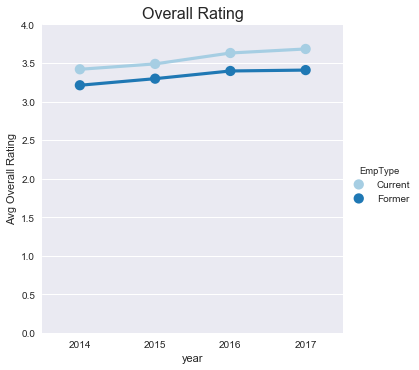

In [41]:
r = sns.factorplot(x="year", y="Rating", hue="EmpType", data=graph_emp_mean,
                   size=5, palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
plt.ylim(0, 4)
r.set_ylabels("Avg Overall Rating")
r.ax.set_title('Overall Rating', fontsize=16)

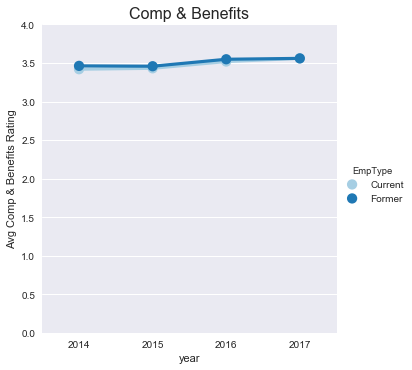

In [42]:
r = sns.factorplot(x="year", y="CompBen", hue="EmpType", data=graph_emp_mean,
                   size=5, palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
plt.ylim(0, 4)
r.set_ylabels("Avg Comp & Benefits Rating")
r.ax.set_title('Comp & Benefits', fontsize=16)

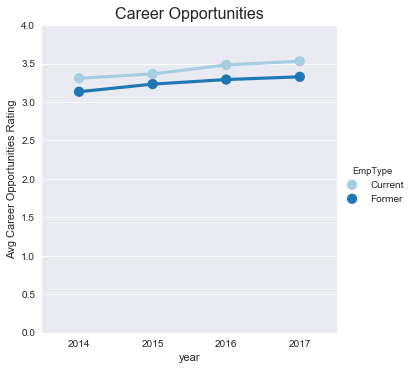

In [43]:
r = sns.factorplot(x="year", y="CareerOpp", hue="EmpType", data=graph_emp_mean,
                   size=5, palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
plt.ylim(0, 4)
r.set_ylabels("Avg Career Opportunities Rating")
r.ax.set_title('Career Opportunities', fontsize=16)

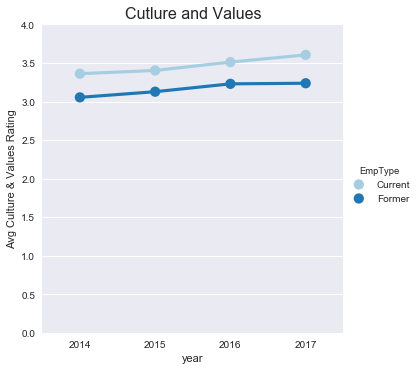

In [44]:
r = sns.factorplot(x="year", y="CultureVal", hue="EmpType", data=graph_emp_mean,
                   size=5, palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
plt.ylim(0, 4)
r.set_ylabels("Avg Culture & Values Rating")
r.ax.set_title('Cutlure and Values', fontsize=16)

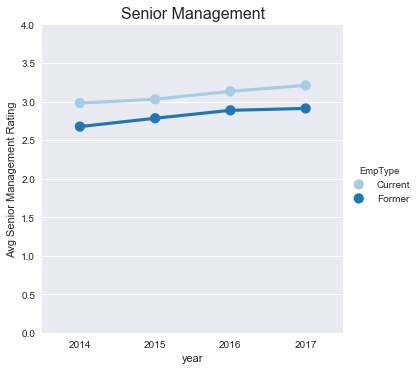

In [45]:
r = sns.factorplot(x="year", y="SnrMgmt", hue="EmpType", data=graph_emp_mean,
                   size=5, palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
plt.ylim(0, 4)
r.set_ylabels("Avg Senior Management Rating")
r.ax.set_title('Senior Management', fontsize=16)

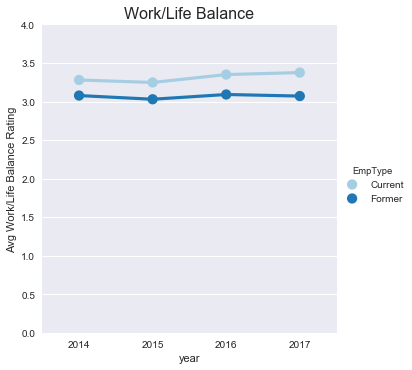

In [46]:
r = sns.factorplot(x="year", y="WorkLife", hue="EmpType", data=graph_emp_mean,
                   size=5, palette="Paired")
r.despine(left=True)
r.set_xticklabels(["2014", "2015", "2016", "2017"])
r.set_ylabels("Avg Work/Life Balance Rating")
plt.ylim(0, 4)
r.ax.set_title('Work/Life Balance', fontsize=16)

In [47]:
check = Glassdoor_df[['OpCEO', 'CareerOpp']]

In [48]:
career_CEO = check.dropna()
career_CEO.groupby('OpCEO').mean()

,CareerOpp
OpCEO,
Approves of,3.758420
Disapproves of,2.322976
No opinion of,3.041162


In [49]:
career_CEO.groupby('OpCEO').count()

,CareerOpp
OpCEO,
Approves of,23516
Disapproves of,6276
No opinion of,15281


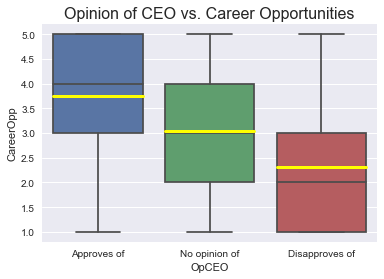

In [50]:
meanprops = dict(linestyle='-', linewidth=3, color='yellow')
r = sns.boxplot(x='OpCEO', y='CareerOpp', data=career_CEO, showmeans = True, meanline= True, meanprops= meanprops)
plt.title('Opinion of CEO vs. Career Opportunities', fontsize=16)

In [53]:
app = career_CEO[career_CEO.OpCEO.isin(['Approves of'])]
disapp = career_CEO[career_CEO.OpCEO.isin(['Disapproves of'])]
no_op = career_CEO[career_CEO.OpCEO.isin(['No opinion of'])]

app_ar= np.array(app['CareerOpp'], dtype = pd.Series)
disapp_ar= np.array(disapp['CareerOpp'], dtype = pd.Series)
no_op_ar= np.array(no_op['CareerOpp'], dtype = pd.Series)

In [54]:
stats.f_oneway(app_ar, disapp_ar, no_op_ar)

F_onewayResult(statistic=5133.2528277819729, pvalue=0.0)

In [56]:
# perform Tukey post-hoc as p-value is insignificant:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(career_CEO['CareerOpp'], career_CEO['OpCEO'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
    group1         group2     meandiff  lower   upper  reject
-------------------------------------------------------------
 Approves of   Disapproves of -1.4354  -1.4714 -1.3995  True 
 Approves of   No opinion of  -0.7173  -0.7435  -0.691  True 
Disapproves of No opinion of   0.7182   0.6803  0.7561  True 
-------------------------------------------------------------
['Approves of' 'Disapproves of' 'No opinion of']
